In [55]:
%pip install scipy
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
def lorentz_force(y, t, q, m, B):
    vx, vy, vz = y[3], y[4], y[5]
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = (q / m) * (vy * B[2] - vz * B[1])
    dvydt = (q / m) * (vz * B[0] - vx * B[2])
    dvzdt = (q / m) * (vx * B[1] - vy * B[0])
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]

In [57]:
def three_D_plot(x,y,z):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory
    ax.plot(x, y, z, label='Particle Trajectory')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')
    ax.set_title('Particle Trajectory in Magnetic Field')
    ax.legend()
    plt.show()

In [58]:
# Initial conditions
x0 = 0.0  # Initial x position
y0 = 0.0  # Initial y position
z0 = 0.0  # Initial z position
vx0 = 1e6  # Initial x velocity (m/s)
vy0 = 0.0  # Initial y velocity
vz0 = 0.0  # Initial z velocity
y0 = [x0, y0, z0, vx0, vy0, vz0]  # Initial state vector

In [59]:
# Particle properties
q = 1.6e-19  # Charge of an electron (C)
m = 9.11e-31  # Mass of an electron (kg)

# Magnetic field
B = [0.00, 0.001, 0.0]  # Magnetic field vector (T)

# Time span
t = np.linspace(0, 1e-9, 1000)  # Time span (s)

In [60]:
# Solve the differential equation
sol = odeint(lorentz_force, y0, t, args=(q, m, B))

# Extract the position and velocity components
x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]
vx = sol[:, 3]
vy = sol[:, 4]
vz = sol[:, 5]

# Print the final deflection
print(f"Final deflection: x = {x[-1]:.2e} m, y = {y[-1]:.2e} m, z = {z[-1]:.2e} m")

Final deflection: x = 9.95e-04 m, y = 0.00e+00 m, z = 8.76e-05 m


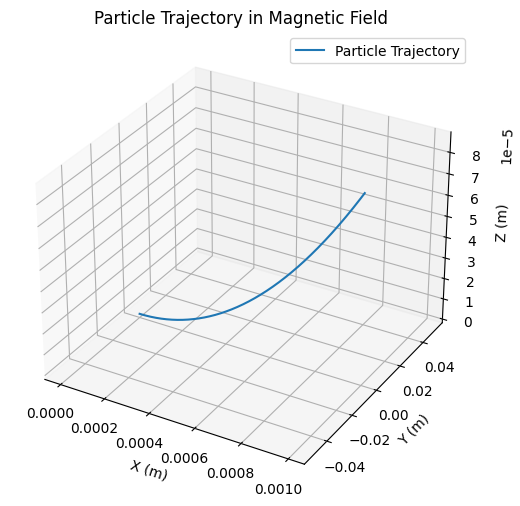

In [61]:
three_D_plot(x,y,z)